In [31]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

/home/kaiolae/code/word_models_keras_test/WorldModels


In [40]:
import fnmatch
UPPER_FOLDER = "../nov16_rescaled_inputs/" #../"#"../nov16_rescaled_inputs/"#nov15_half_training_rate_skip5/"#"../nov14_half_training_rate_skip5/" # "../"
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir(UPPER_FOLDER):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append(UPPER_FOLDER+folder)
            else:
                all_models[num_mixtures] = [UPPER_FOLDER+folder]
            
    return all_models
            
print(get_all_models())

{2: ['../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run5', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run3', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run2', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run4', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run1'], 1: ['../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run5', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run2', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run1', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run3', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run4'], 16: ['../nov16_rescaled_inputs/trained_sequential_rnn_16mixtures_run4', '../nov16_rescaled_inputs/trained_sequential_rnn_16mixtures_run2', '../nov16_rescaled_inputs/trained_sequential_rnn_16mixtures_run5', '../nov16_rescaled_inputs/trained_sequential_rnn_16mixtures_run3', '../nov16_rescaled_inputs/trained_sequential_rnn_16mixtu

In [41]:
#Getting training history

training_histories = {}
filename = "training_history.h5"
model_name = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    training_histories[key] = []
    for folder_name in val:
        if model_name not in os.listdir(folder_name):
            print("Unfinished run. Skipping.")
            continue
        training_histories[key].append(folder_name+"/"+filename)

print("histories: ", training_histories)

histories:  {2: ['../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run5/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run3/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run2/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run4/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_2mixtures_run1/training_history.h5'], 1: ['../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run5/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run2/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run1/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run3/training_history.h5', '../nov16_rescaled_inputs/trained_sequential_rnn_1mixtures_run4/training_history.h5'], 16: ['../nov16_rescaled_inputs/trained_sequential_rnn_16mixtures_run4/training_history.h5', '../nov16_rescaled_inputs

In [42]:
import pickle
loss_summary = []
for num_mixtures, history_files in training_histories.items():
    for history_file in history_files:
        with open(history_file, 'rb') as file:
            content=pickle.load(file)
            content['num_mixtures'] = num_mixtures
            loss_summary.append(content)
#print(loss_summary)
import pandas as pd
l_frame = pd.DataFrame(loss_summary)
print("Any NaNs?")
print(l_frame.isnull().values.any())
#print([l['loss'] for l in loss_summary if l['num_mixtures'] == 8])

Any NaNs?
False


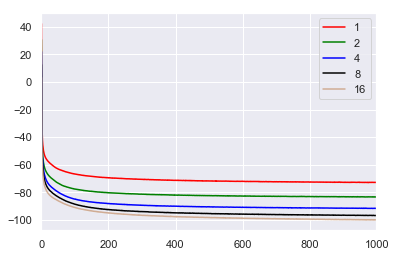

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 1], ci='sd', color="red", condition="1")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 2], color="green", condition="2")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 4], color="blue", condition="4")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 8], color="black", condition="8")
sns.tsplot([l['loss'] for l in loss_summary if l['num_mixtures'] == 16], color="pink", condition="16")
plt.legend()
# It looks like there are no confidence intervals here, but I wonder if they are just
# too narrow to be seen? Extremely stable behaviors.